In [1]:
# ===============================================================================================================#
# Copyright 2022 Infosys Ltd.                                                                                    #
# Use of this source code is governed by Apache License Version 2.0 that can be found in the LICENSE file or at  #
# http://www.apache.org/licenses/                                                                                #
# ===============================================================================================================#

## 1. Preparation

In [2]:
from libraries._internal_utils.demo_helper import DemoHelper
import pandas as pd
from IPython.display import Image

#### <span style='color:blue'>Enter image and OCR file paths</span>

In [3]:
IMAGE_PATHS=["./data/coi_1.jpg", "./data/coi_2.jpg"]
IMAGE_OCR_PATHS=['./data/coi_1.jpg.hocr', './data/coi_2.jpg.hocr']

#### Visualize

In [4]:
tab_widget = DemoHelper.create_tab_toolbar(IMAGE_PATHS)
display(tab_widget)
for idx, image_path in enumerate(IMAGE_PATHS):
    with tab_widget.children[idx]:
        display(Image(filename=image_path, width=1000, height=50))

## 2. Initialization

#### <span style='color:blue'>Create new instance with desired OCR service provider</span>

In [ ]:
import json
import logging
import os

from infy_ocr_parser import ocr_parser
from infy_ocr_parser.providers.tesseract_ocr_data_service_provider import TesseractOcrDataServiceProvider
from infy_ocr_parser.providers.azure_read_ocr_data_service_provider import AzureReadOcrDataServiceProvider

ocr_file_list = IMAGE_OCR_PATHS
ocr_file_list = [os.path.abspath(ocr_file) for ocr_file in ocr_file_list]

if not os.path.exists("./logs"):
    os.makedirs("./logs")
logging.basicConfig(
    filename=("./logs" + "/app_log.log"),
    format="%(asctime)s- %(levelname)s- %(message)s",
    level=logging.INFO,
    datefmt="%d-%b-%y %H:%M:%S",
)
logger = logging.getLogger()

# Uncomment below for Tesseract OCR service
data_service_provider_obj = TesseractOcrDataServiceProvider()
# Uncomment below for Azure OCR Read service
# data_service_provider_obj = AzureReadOcrDataServiceProvider()

ocr_parse_obj = ocr_parser.OcrParser(ocr_file_list=ocr_file_list,
                                     data_service_provider=data_service_provider_obj,
                                     logger=logger)

#### <span style='color:blue'>Enter Within Bounding Box Coordinates</span>

In [6]:
# Format = [x,y,w,h]
my_within_bbox = [100, 590, 590, 130]

#### Visualize

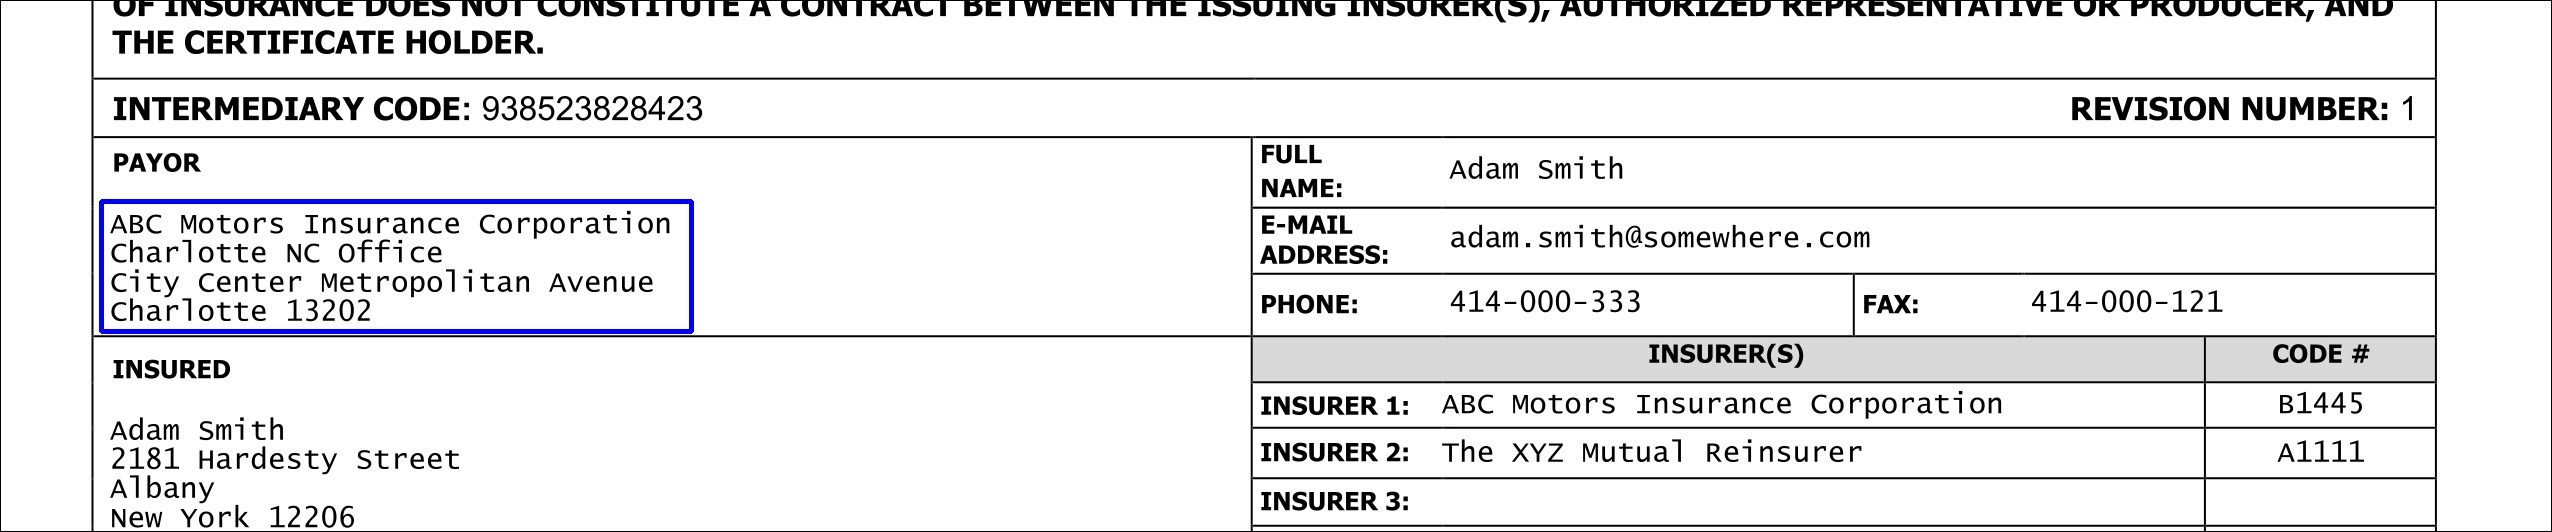

In [7]:
img = DemoHelper.read_image(IMAGE_PATHS[0])
img = DemoHelper.draw_bboxes_on_image(img, [my_within_bbox], border_thickness=4,
                                         border_color = DemoHelper.Constants.COLOR_BLUE)
img = DemoHelper.reduce_image_based_on_context(img, [my_within_bbox])

DemoHelper.show_image(img)

## 3. API - get_tokens_from_ocr()

In [8]:
TOKEN_TYPE_WORD=1
TOKEN_TYPE_LINE=2
TOKEN_TYPE_PHRASE=3

### 3.1 - Get `word` tokens for the given region and pages

In [9]:
result = ocr_parse_obj.get_tokens_from_ocr(
    token_type_value=TOKEN_TYPE_WORD, 
    within_bbox=my_within_bbox,
    pages=[1]
)

#### Output

In [10]:
df = pd.json_normalize(result)
print('No. of records found =', len(df))
df

No. of records found = 11


,id,page,text,bbox,conf,scalingFactor.ver,scalingFactor.hor
0,word_1_109_604_160_623,1,ABC,"[109, 604, 51, 19]",96,1.0,1.0
1,word_1_110_629_265_662,1,Charlotte,"[110, 629, 155, 33]",95,1.0,1.0
2,word_1_110_662_296_710,1,Seer,"[110, 662, 186, 48]",0,1.0,1.0
3,word_1_180_604_282_623,1,Motors,"[180, 604, 102, 19]",96,1.0,1.0
4,word_1_287_633_318_652,1,NC,"[287, 633, 31, 19]",95,1.0,1.0
5,word_1_304_604_458_623,1,Insurance,"[304, 604, 154, 19]",91,1.0,1.0
6,word_1_305_662_370_710,1,eas,"[305, 662, 65, 48]",28,1.0,1.0
7,word_1_338_628_441_652,1,Office,"[338, 628, 103, 24]",37,1.0,1.0
8,word_1_479_596_667_632,1,Corporation,"[479, 596, 188, 36]",96,1.0,1.0
9,word_1_481_658_526_686,1,an,"[481, 658, 45, 28]",16,1.0,1.0


#### Visualize

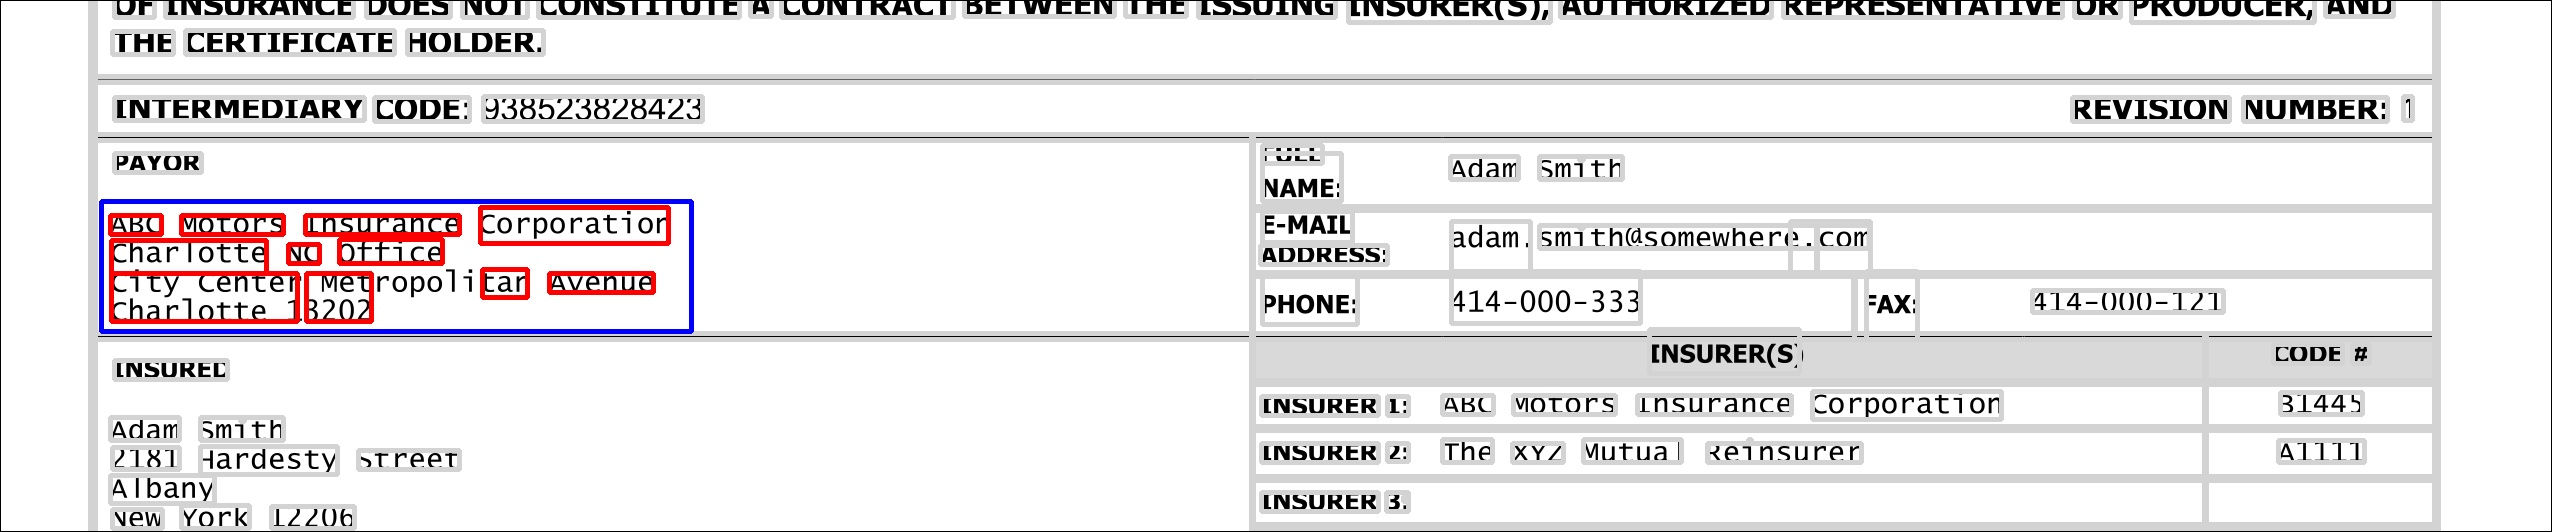

In [11]:
# Get all tokens i.e. without any bounding box restrictions
all_tokens = ocr_parse_obj.get_tokens_from_ocr(
    token_type_value=1,     
    pages=[1]
)
all_tokens_text_bboxes = [x['bbox'] for x in all_tokens]

text_bboxes = [x['bbox'] for x in result]
all_bboxes = text_bboxes + [my_within_bbox]
img = DemoHelper.read_image(IMAGE_PATHS[0])
img = DemoHelper.draw_bboxes_on_image(img, all_tokens_text_bboxes, border_color = DemoHelper.Constants.COLOR_GRAY)
img = DemoHelper.draw_bboxes_on_image(img, [my_within_bbox], border_color = DemoHelper.Constants.COLOR_BLUE)
img = DemoHelper.draw_bboxes_on_image(img, text_bboxes, border_color = DemoHelper.Constants.COLOR_RED)
img = DemoHelper.reduce_image_based_on_context(img, all_bboxes)

DemoHelper.show_image(img)

### 3.2 - Get `phrase` tokens for the given region and pages

In [12]:
result = ocr_parse_obj.get_tokens_from_ocr(
    token_type_value=TOKEN_TYPE_PHRASE, 
    within_bbox=my_within_bbox,
    pages=[1]
)

#### Output

In [13]:
df = pd.json_normalize(result)
print('No. of records found =', len(df))
df

No. of records found = 4


,id,page,text,bbox,words,scalingFactor.ver,scalingFactor.hor
0,phrase_1_109_596_667_632,1,ABC Motors Insurance Corporation,"[109, 596, 558, 36]","[{'id': 'word_1_109_604_160_623', 'page': 1, '...",1.0,1.0
1,phrase_1_110_628_441_662,1,Charlotte NC Office,"[110, 628, 331, 34]","[{'id': 'word_1_110_629_265_662', 'page': 1, '...",1.0,1.0
2,phrase_1_110_662_370_710,1,Seer eas,"[110, 662, 260, 48]","[{'id': 'word_1_110_662_296_710', 'page': 1, '...",1.0,1.0
3,phrase_1_481_658_652_686,1,an avenue,"[481, 658, 171, 28]","[{'id': 'word_1_481_658_526_686', 'page': 1, '...",1.0,1.0


#### Visualize

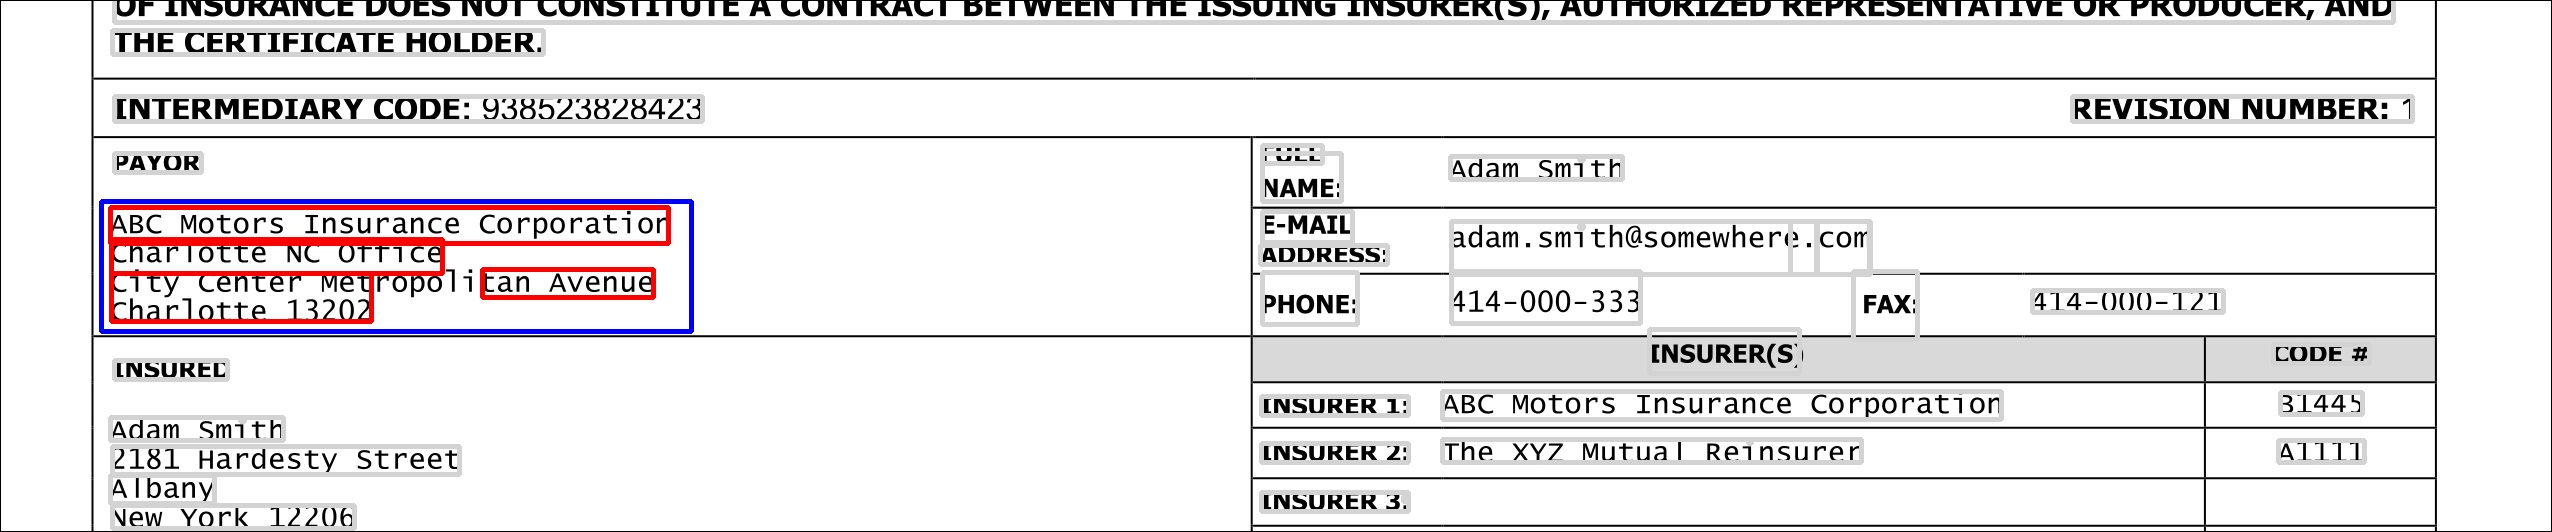

In [14]:
# Get all tokens i.e. without any bounding box restrictions
all_tokens = ocr_parse_obj.get_tokens_from_ocr(
    token_type_value=3,     
    pages=[1]
)
all_tokens_text_bboxes = [x['bbox'] for x in all_tokens]

text_bboxes = [x['bbox'] for x in result]
all_bboxes = text_bboxes + [my_within_bbox]
img = DemoHelper.read_image(IMAGE_PATHS[0])
img = DemoHelper.draw_bboxes_on_image(img, all_tokens_text_bboxes, border_color = DemoHelper.Constants.COLOR_GRAY)
img = DemoHelper.draw_bboxes_on_image(img, [my_within_bbox], border_color = DemoHelper.Constants.COLOR_BLUE)
img = DemoHelper.draw_bboxes_on_image(img, text_bboxes, border_color = DemoHelper.Constants.COLOR_RED)
img = DemoHelper.reduce_image_based_on_context(img, all_bboxes)

DemoHelper.show_image(img)

### 3.3 - Get `line` tokens for the given region and pages

In [15]:
result = ocr_parse_obj.get_tokens_from_ocr(
    token_type_value=TOKEN_TYPE_LINE,
    within_bbox=my_within_bbox,
    pages=[1]
)

#### Output

In [16]:
df = pd.json_normalize(result)
print('No. of records found =', len(df))
df[1:5]

No. of records found = 0


""


#### Visualize

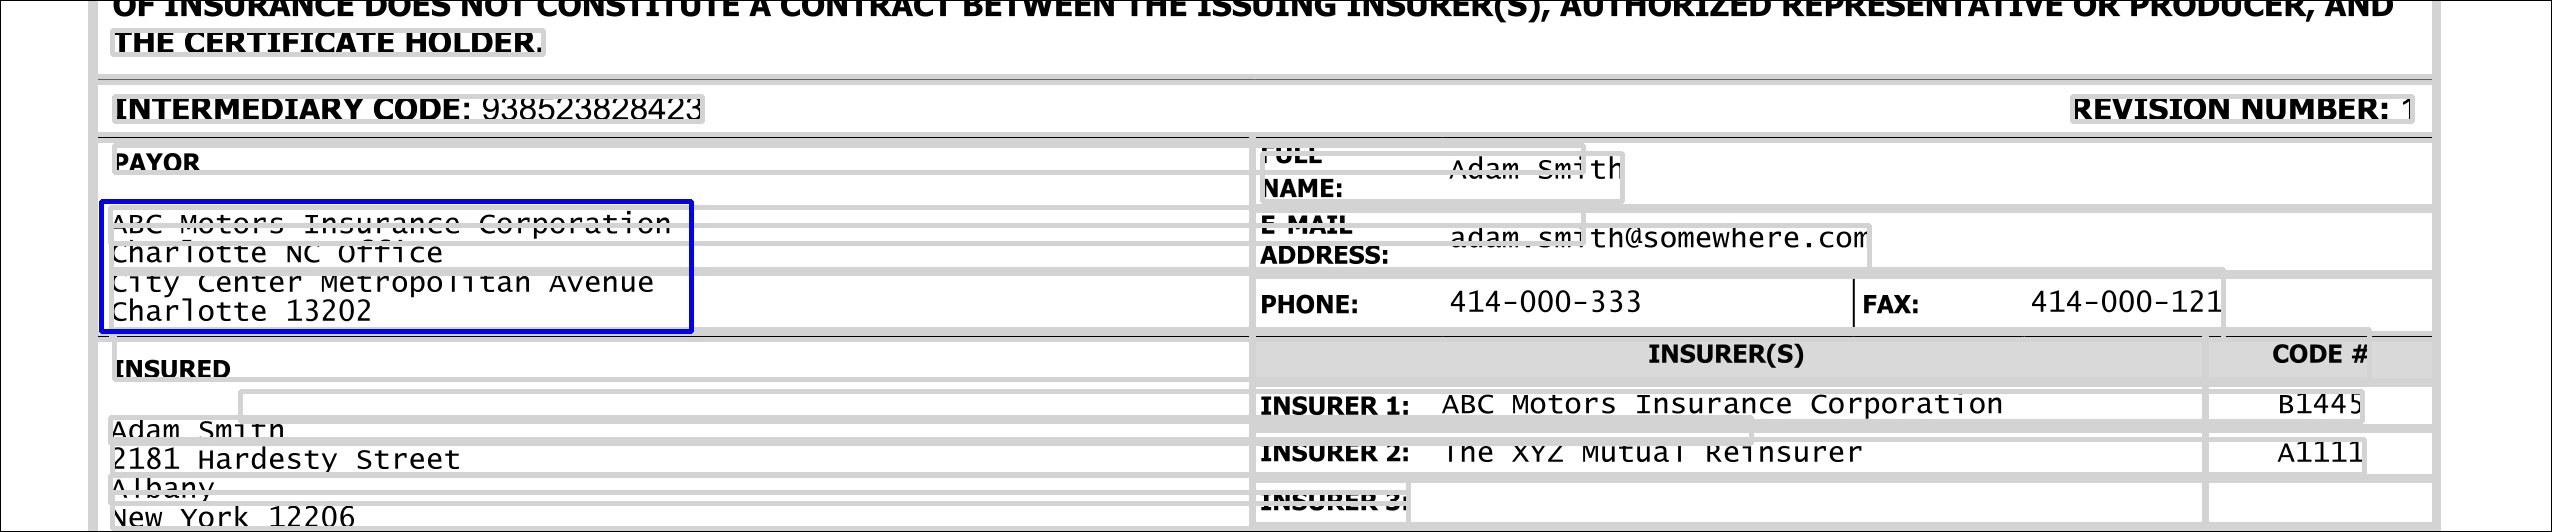

In [17]:
# Get all tokens i.e. without any bounding box restrictions
all_tokens = ocr_parse_obj.get_tokens_from_ocr(
    token_type_value=2,     
    pages=[1]
)
all_tokens_text_bboxes = [x['bbox'] for x in all_tokens]

text_bboxes = [x['bbox'] for x in result]
all_bboxes = text_bboxes + [my_within_bbox]
img = DemoHelper.read_image(IMAGE_PATHS[0])
img = DemoHelper.draw_bboxes_on_image(img, all_tokens_text_bboxes, border_color = DemoHelper.Constants.COLOR_GRAY)
img = DemoHelper.draw_bboxes_on_image(img, [my_within_bbox], border_color = DemoHelper.Constants.COLOR_BLUE)
img = DemoHelper.draw_bboxes_on_image(img, text_bboxes, border_color = DemoHelper.Constants.COLOR_RED)
img = DemoHelper.reduce_image_based_on_context(img, all_bboxes)

DemoHelper.show_image(img)